# Plot BF, MST, and LS results

### Creates plots to compare the performance between three algorithms that solve the travelling salesman problem

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Load Data

In [67]:
times = [15,30,60,300]
num_times = len(times)

# Load data into pandas dataframe
df = pd.read_csv('../data/cse_project_dummy.csv',header=1)

# Get city (Instance) names
graphs = df['Instance'].iloc[::4].values

def get_dimension(filepath):
    with open(filepath, 'r') as file:
        for line in file:
            if 'DIMENSION' in line:
                space = line.split()
                return int(space[1].strip())  # Get the number and remove extra spaces

def reshape_col(col):
    '''
        Args:
            col (np.array)
                e.g. df['Brute Force'].values
    '''
    # Reshape the array into groups of 4 values
    return col[:len(col) // 4 * 4].reshape(-1, 4) 

# Get city sizes (number of nodes in graph) from .tsp files 
dimensions = []
for graph in graphs:
    dimensions.append(get_dimension(f'../data/{graph}.tsp'))

# Get qualities
BF = reshape_col(df['Brute Force'].values)
LS = reshape_col(df['Local Search'].values)
AP = reshape_col(df['Approximate'].values)

In [69]:
df

,Instance,Time (s),Brute Force,Local Search,Approximate,Brute Force.1,Local Search.1,Approximate.1
0,Atlanta,15,11,111,1111,0.099099,1,10.009009
1,Atlanta,30,22,222,2222,0.099099,1,10.009009
2,Atlanta,60,33,333,3333,0.099099,1,10.009009
3,Atlanta,300,44,444,4444,0.099099,1,10.009009
4,Berlin,15,55,555,5555,0.099099,1,10.009009
5,Berlin,30,66,666,6666,0.099099,1,10.009009
6,Berlin,60,77,777,7777,0.099099,1,10.009009
7,Berlin,300,88,888,8888,0.099099,1,10.009009
8,Boston,15,99,999,9999,0.099099,1,10.009009
9,Boston,30,110,1110,11110,0.099099,1,10.009009


### Plot

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
def plot_quality_v_time(times, city, city_size, yBF, yAP, yLS):
    sns.set_theme()
    
    plt.figure(figsize=(7, 6))
    sns.lineplot(x=times, y=yBF, marker='o', label='Brute Force') #, palette="tab10")
    sns.lineplot(x=times, y=yAP, marker='o', label='Minimum Spanning Tree')
    sns.lineplot(x=times, y=yLS, marker='o', label='Simulated Annealing')
    
    # Customize plot labels and title
    plt.title(f'{city}, {city_size} locations', fontsize=14)
    plt.xlabel('Runtime (seconds)', fontsize=12)
    plt.ylabel('Quality (total path distance)', fontsize=12)
    
    # Show legend
    plt.legend(title='Algorithm')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

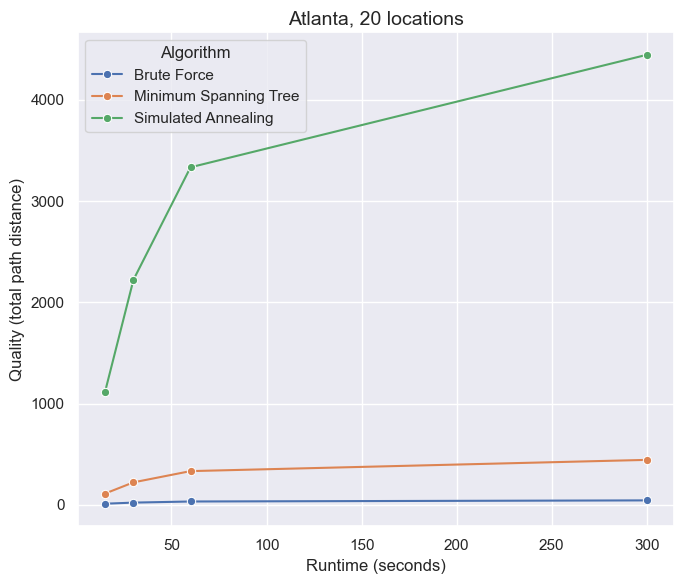

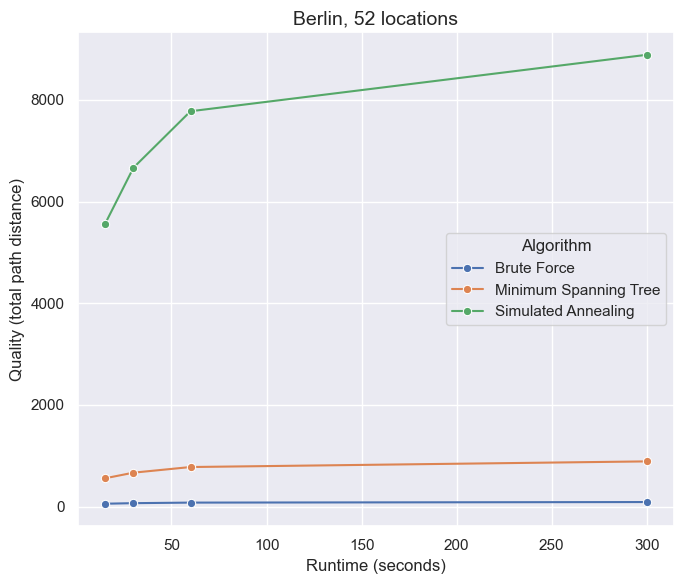

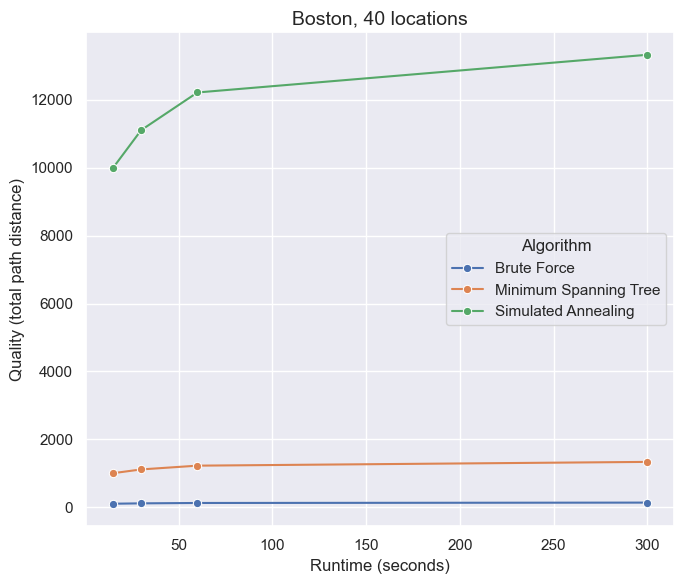

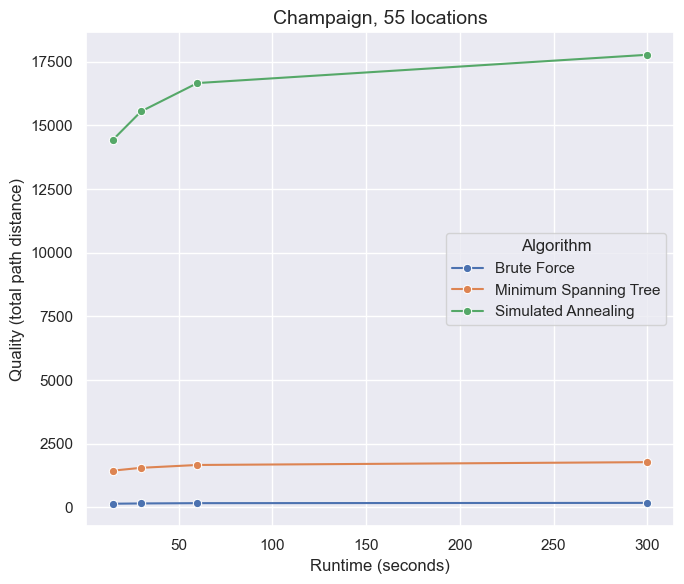

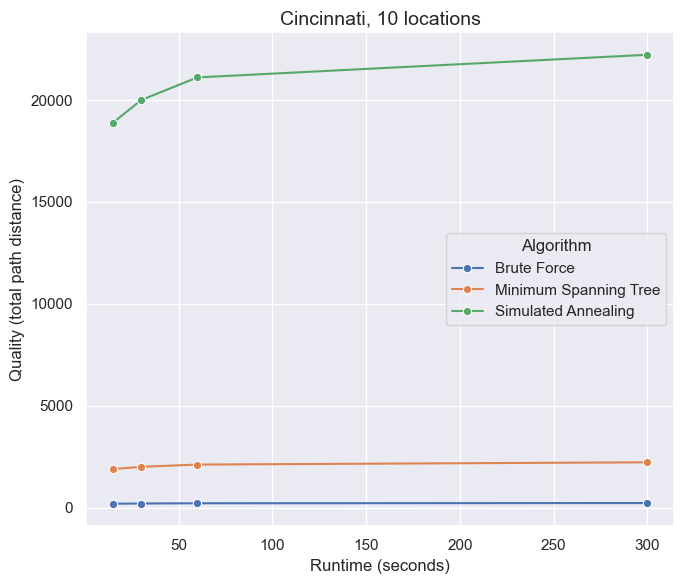

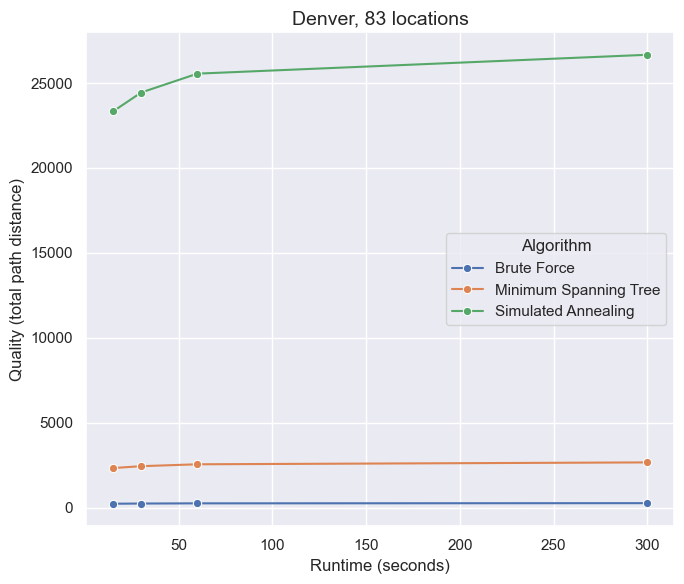

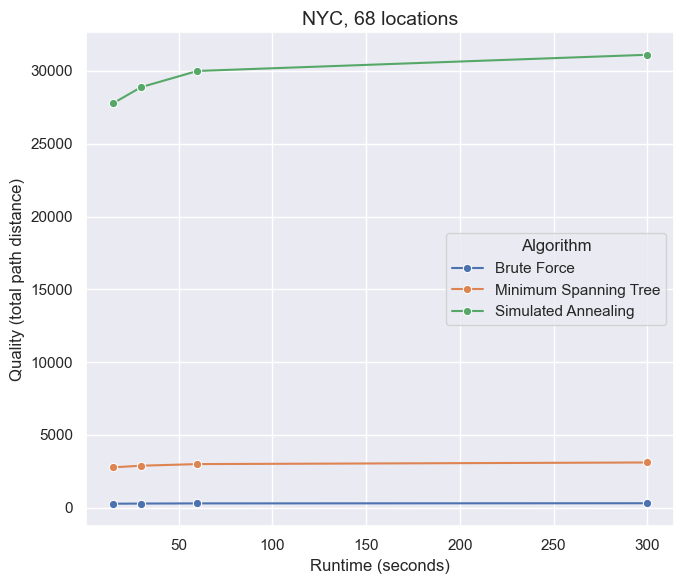

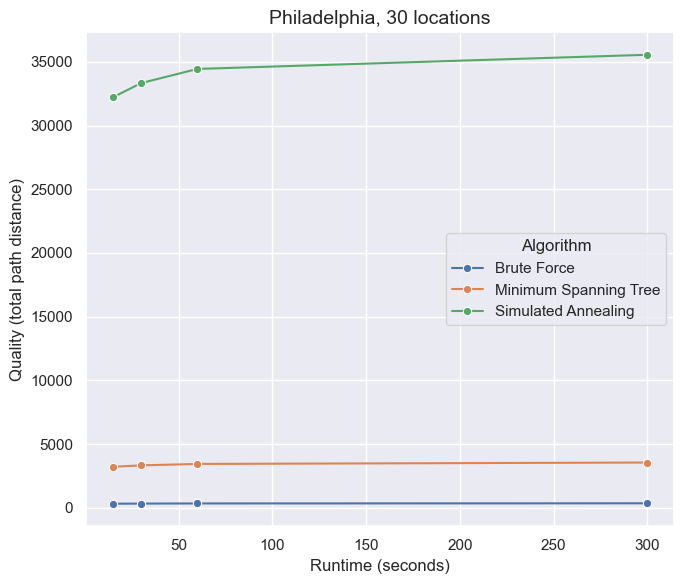

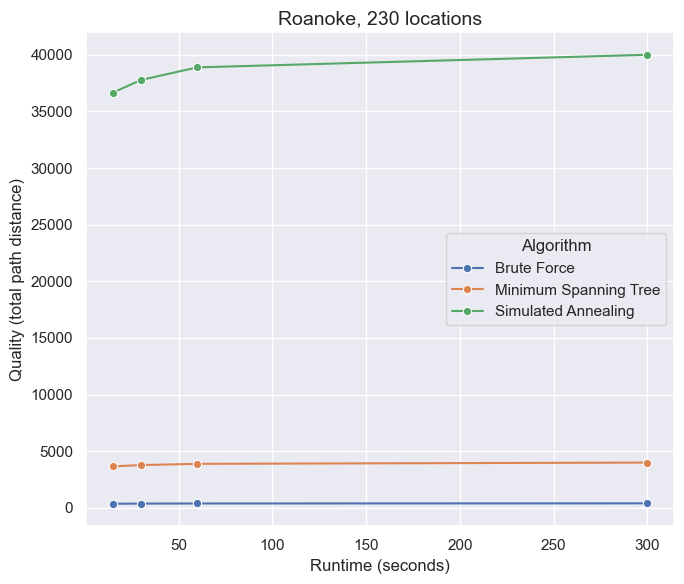

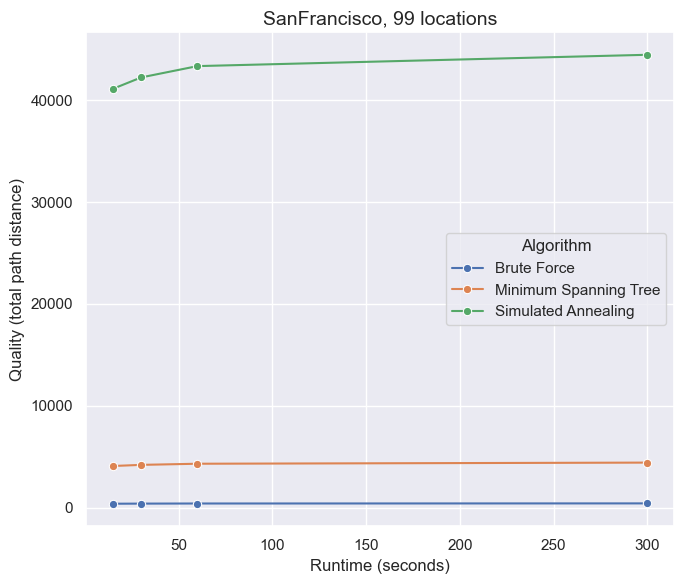

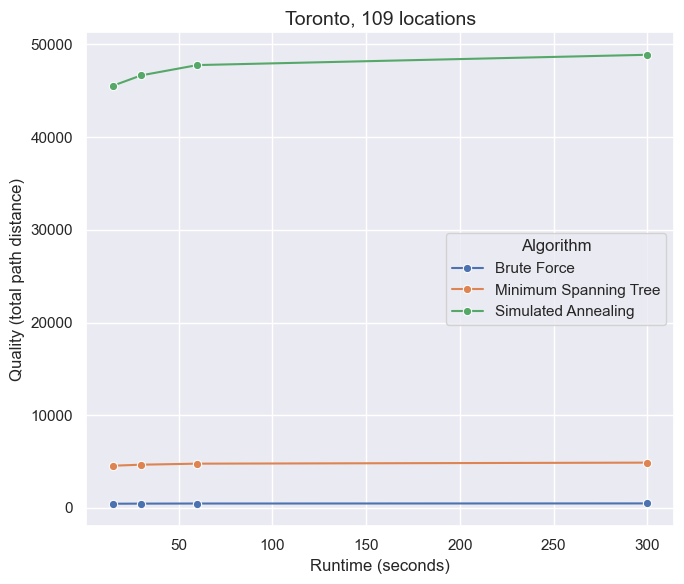

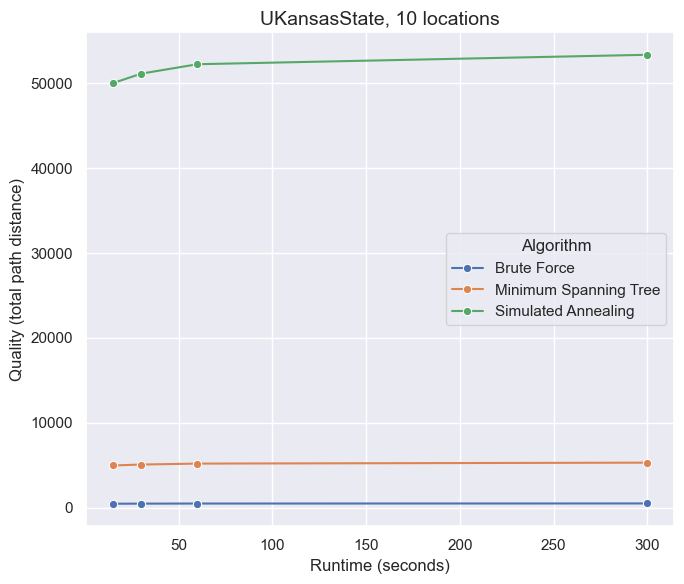

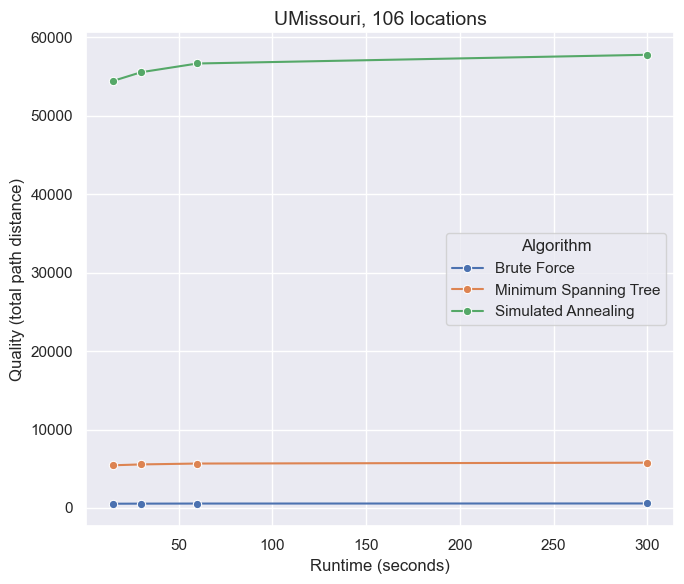

In [74]:
for e, city in enumerate(graphs):
    plot_quality_v_time(times, city, dimensions[e], BF[e], LS[e], AP[e])
    

# Scratch

In [89]:
df = pd.read_csv('../output/ls_results.csv').T

In [90]:
df.to_csv('for_copying_to_deliverable.csv')

In [91]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0.1,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0,Atlanta,Berlin,Boston,Champaign,Cincinnati,Denver,NYC,Philadelphia,Roanoke,SanFransisco,Toronto,UKansasState,UMissouri
15,2383751.599584,21592.154443,1679287.207676,146742.737969,277952.586496,414736.169466,4291320.014076,1983411.310647,6062910.76962,4216679.847363,6743238.074682,62962.312807,589753.46669
30,2313977.818587,21317.669168,1660940.339539,127342.141393,277952.586496,346297.677227,4255917.060687,1882834.260362,5898881.133004,3554557.695093,6286286.828446,62962.312807,509878.989343
60,2317747.236801,18184.021365,1636113.080365,123268.11187,277952.586496,338544.012126,4232873.769924,1851419.911437,4959085.127712,3489123.333083,5989344.470689,62962.312807,506233.45953
300,2226067.852108,17531.173095,1572912.535786,121902.816635,277952.586496,337687.706553,4137317.792605,1819612.799647,5149364.104804,3589354.749411,5828905.502803,62962.312807,489173.658275
15.1,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
30.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
